In [1]:
import pandas as pd
import matplotlib as mp
contents = pd.read_csv("train_data_final.csv")


In [2]:
categorical_variables = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68'] 

contents.drop(categorical_variables,axis=1,inplace=True)

payment_variables = []
spending_variables = []
delinquency_variables = []
balance_variables = []
risk_variables = []
for column in contents.columns:
    if 'P' in column:
        payment_variables.append(column)
    if 'S' in column:
        spending_variables.append(column)
    if 'D' in column and 'ID' not in column:
        delinquency_variables.append(column)
    if 'B' in column:
        balance_variables.append(column)
    if 'R' in column:
        risk_variables.append(column)

print(delinquency_variables)

['D_39', 'D_41', 'D_42', 'D_43', 'D_44', 'D_45', 'D_46', 'D_47', 'D_48', 'D_49', 'D_50', 'D_51', 'D_52', 'D_53', 'D_54', 'D_55', 'D_56', 'D_58', 'D_59', 'D_60', 'D_61', 'D_62', 'D_65', 'D_69', 'D_70', 'D_71', 'D_72', 'D_73', 'D_74', 'D_75', 'D_76', 'D_77', 'D_78', 'D_79', 'D_80', 'D_81', 'D_82', 'D_83', 'D_84', 'D_86', 'D_87', 'D_88', 'D_89', 'D_91', 'D_92', 'D_93', 'D_94', 'D_96', 'D_102', 'D_103', 'D_104', 'D_105', 'D_106', 'D_107', 'D_108', 'D_109', 'D_110', 'D_111', 'D_112', 'D_113', 'D_115', 'D_118', 'D_119', 'D_121', 'D_122', 'D_123', 'D_124', 'D_125', 'D_127', 'D_128', 'D_129', 'D_130', 'D_131', 'D_132', 'D_133', 'D_134', 'D_135', 'D_136', 'D_137', 'D_138', 'D_139', 'D_140', 'D_141', 'D_142', 'D_143', 'D_144', 'D_145']


In [3]:
pd.set_option('display.max_rows',None)
contents.drop('customer_ID',axis=1,inplace=True)

contents.info(max_cols=195,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276572 entries, 0 to 276571
Data columns (total 180 columns):
 #    Column      Non-Null Count   Dtype  
---   ------      --------------   -----  
 0    Unnamed: 0  276572 non-null  int64  
 1    S_2         276572 non-null  object 
 2    P_2         274277 non-null  float64
 3    D_39        276572 non-null  float64
 4    B_1         276572 non-null  float64
 5    B_2         276476 non-null  float64
 6    R_1         276572 non-null  float64
 7    S_3         225400 non-null  float64
 8    D_41        276476 non-null  float64
 9    B_3         276476 non-null  float64
 10   D_42        39357 non-null   float64
 11   D_43        193452 non-null  float64
 12   D_44        262857 non-null  float64
 13   B_4         276572 non-null  float64
 14   D_45        276476 non-null  float64
 15   B_5         276572 non-null  float64
 16   R_2         276572 non-null  float64
 17   D_46        215973 non-null  float64
 18   D_47        276572 non

In [4]:
contents.notna().sum()

Unnamed: 0    276572
S_2           276572
P_2           274277
D_39          276572
B_1           276572
B_2           276476
R_1           276572
S_3           225400
D_41          276476
B_3           276476
D_42           39357
D_43          193452
D_44          262857
B_4           276572
D_45          276476
B_5           276572
R_2           276572
D_46          215973
D_47          276572
D_48          240733
D_49           27226
B_6           276568
B_7           276572
B_8           275402
D_50          119378
D_51          276572
B_9           276572
R_3           276572
D_52          275080
P_3           261411
B_10          276572
D_53           72394
S_5           276572
B_11          276572
S_6           276572
D_54          276476
R_4           276572
S_7           225400
B_12          276572
S_8           276572
D_55          267353
D_56          126557
B_13          274054
R_5           276572
D_58          276572
S_9           129671
B_14          276572
D_59         

In [5]:
pd.set_option('display.max_rows',20)
contents[contents['P_2'].isna()]

,Unnamed: 0,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
411,4732228,2017-07-28,NaN,0.000996,0.002041,0.814279,0.009560,NaN,0.003586,0.008875,...,NaN,NaN,0.008308,0.001609,0.007423,NaN,0.003086,0.005993,0.009139,0
559,5434874,2018-01-20,NaN,0.001712,0.003781,0.810946,0.005817,NaN,0.008217,0.006753,...,NaN,NaN,0.000193,0.001974,0.003761,NaN,0.008485,0.001002,0.002589,0
581,4790069,2017-06-04,NaN,0.006803,0.331306,0.816098,0.000273,0.354266,0.007548,0.004502,...,NaN,NaN,NaN,0.002476,NaN,NaN,NaN,0.002598,NaN,0
744,1395044,2017-06-25,NaN,0.001750,0.130514,0.811767,0.001172,0.177758,0.001988,0.003734,...,NaN,NaN,NaN,0.000141,NaN,NaN,NaN,0.004857,NaN,1
773,3560937,2018-03-29,NaN,0.008568,0.002716,0.811562,0.509233,0.759026,0.006266,0.010770,...,0.00063,0.009936,0.004754,0.002458,0.000301,NaN,0.006386,0.008323,0.001319,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275883,3967537,2017-04-11,NaN,0.003327,0.009667,0.817350,0.009800,NaN,0.004681,0.000689,...,NaN,NaN,0.004761,0.005119,0.008709,NaN,0.005945,0.003846,0.003581,0
275955,2571719,2017-06-13,NaN,0.008480,0.006125,0.814733,0.009708,NaN,0.000031,0.009133,...,NaN,NaN,0.009914,0.009757,0.000145,NaN,0.004263,0.000595,0.004488,0
276034,2498504,2017-07-30,NaN,0.005834,0.013901,0.817553,0.002634,0.174709,0.007127,0.004118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
276290,5394798,2017-05-27,NaN,0.009401,0.008935,0.819288,0.007140,NaN,0.001150,0.003381,...,NaN,NaN,0.006661,0.000037,0.002931,NaN,0.008985,0.006560,0.009539,0


In [6]:
contents['P_2'] = contents['P_2'].fillna(contents['P_2'].median())

In [7]:
contents['target'].value_counts()

0    207727
1     68845
Name: target, dtype: int64

In [8]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

payment_variables_target = payment_variables.copy()
payment_variables_target.append('target')

contents[payment_variables_target].corr()['target']

P_2      -0.606831
P_3      -0.244047
P_4       0.235485
target    1.000000
Name: target, dtype: float64

In [9]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

spending_variables_target = spending_variables.copy()
spending_variables_target.append('target')

contents[spending_variables_target].corr()['target']

S_3       0.320134
S_5       0.050241
S_6      -0.097703
S_7       0.331939
S_8      -0.153841
S_9       0.072419
S_11     -0.085083
S_12      0.007074
S_13     -0.106919
S_15      0.189984
S_16      0.068111
S_17      0.035257
S_18     -0.009101
S_19      0.012374
S_20      0.132843
S_22      0.090131
S_23      0.170658
S_24      0.097905
S_25     -0.247013
S_26     -0.045096
S_27     -0.024480
target    1.000000
Name: target, dtype: float64

In [10]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

delinquency_variables_target = delinquency_variables.copy()
delinquency_variables_target.append('target')

contents[delinquency_variables_target].corr()['target']

D_39      0.176520
D_41      0.246224
D_42      0.332121
D_43      0.281167
D_44      0.469934
D_45     -0.270465
D_46      0.156016
D_47     -0.279243
D_48      0.547005
D_49     -0.016257
D_50     -0.085804
D_51     -0.248136
D_52     -0.226090
D_53      0.223869
D_54     -0.136309
D_55      0.456379
D_56     -0.143396
D_58      0.448358
D_59      0.192445
D_60     -0.078383
D_61      0.496994
D_62     -0.351227
D_65      0.104801
D_69      0.011638
D_70      0.301883
D_71     -0.074754
D_72      0.181424
D_73     -0.095825
D_74      0.419973
D_75      0.455876
D_76     -0.115792
D_77     -0.333910
D_78      0.270571
D_79      0.222630
D_80      0.057945
D_81      0.179925
D_82      0.020139
D_83      0.079472
D_84      0.187203
D_86     -0.065253
D_87           NaN
D_88      0.153772
D_89      0.110953
D_91     -0.121785
D_92     -0.147375
D_93     -0.036551
D_94     -0.069987
D_96     -0.062009
D_102     0.021581
D_103     0.122586
D_104     0.121896
D_105    -0.031611
D_106    -0.

In [11]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

balance_variables_target = balance_variables.copy()
balance_variables_target.append('target')

contents[balance_variables_target].corr()['target']

B_1       0.386185
B_2      -0.480921
B_3       0.425635
B_4       0.402672
B_5      -0.068546
B_6      -0.095293
B_7       0.430059
B_8       0.323230
B_9       0.471563
B_10     -0.020117
B_11      0.364999
B_12     -0.044047
B_13     -0.032742
B_14      0.081831
B_15      0.007691
B_16      0.395181
B_17      0.270225
B_18     -0.486525
B_19      0.385684
B_20      0.380335
B_21      0.088228
B_22      0.366588
B_23      0.422405
B_24      0.109979
B_25      0.183590
B_26      0.017413
B_27      0.004888
B_28      0.223733
B_29      0.061650
B_31     -0.061597
B_32      0.102343
B_33     -0.452216
B_36      0.046426
B_37      0.383575
B_39     -0.099193
B_40      0.047127
B_41      0.094847
B_42     -0.127799
target    1.000000
Name: target, dtype: float64

In [12]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

risk_variables_target = risk_variables.copy()
risk_variables_target.append('target')

contents[risk_variables_target].corr()['target']

R_1       0.363745
R_2       0.263613
R_3       0.286312
R_4       0.220099
R_5       0.165115
R_6       0.106384
R_7       0.062832
R_8       0.151606
R_9      -0.013804
R_10      0.236563
R_11      0.094499
R_12     -0.135348
R_13      0.097994
R_14      0.040062
R_15      0.127931
R_16      0.127347
R_17      0.074545
R_18      0.003557
R_19      0.097373
R_20      0.112410
R_21      0.151843
R_22      0.064700
R_23      0.018468
R_24      0.151508
R_25      0.064303
R_26      0.133191
R_27     -0.274128
R_28      0.027718
target    1.000000
Name: target, dtype: float64

In [13]:
columna = 'S_' + '3'
contents[columna].min()

-0.4430886481493405

<AxesSubplot:xlabel='P_2', ylabel='target'>

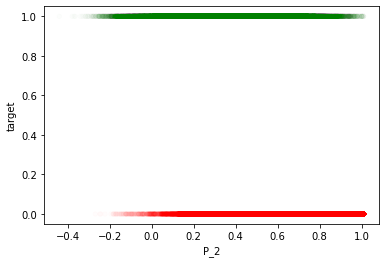

In [14]:
contents.plot.scatter(x='P_2',y='target',c=contents['target'].map({0:'r',1:'g'}),alpha=0.01)

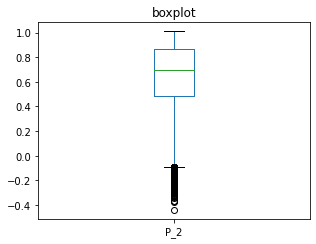

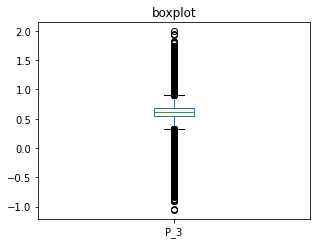

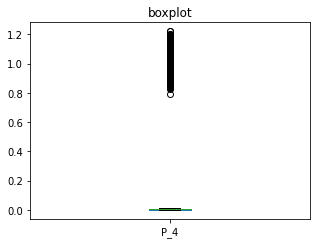

In [15]:
import numpy as np
from matplotlib import pyplot as plt

# Set the figure size
plt.rcParams["figure.figsize"] = [4.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Plot the dataframe
for v in payment_variables:
    ax = contents[v].plot(kind='box', title='boxplot')

    # Display the plot
    plt.show()

In [16]:
from sklearn.ensemble import IsolationForest

feature_analysis = contents.drop('S_2',axis=1)\
.drop('D_42',axis=1) \
.drop('D_49',axis=1) \
.drop('D_53',axis=1) \
.drop('D_73',axis=1) \
.drop('D_76',axis=1) \
.drop('R_9',axis=1)  \
.drop('D_82',axis=1) \
.drop('B_29',axis=1) \
.drop('D_87',axis=1) \
.drop('D_88',axis=1) \
.drop('D_106',axis=1)\
.drop('R_26',axis=1) \
.drop('D_108',axis=1)\
.drop('D_110',axis=1)\
.drop('D_111',axis=1)\
.drop('B_39',axis=1) \
.drop('B_42',axis=1) \
.drop('D_132',axis=1)\
.drop('D_134',axis=1)\
.drop('D_135',axis=1)\
.drop('D_136',axis=1)\
.drop('D_137',axis=1)\
.drop('D_138',axis=1)\
.drop('D_142',axis=1)\


delinquency_variables_redux = delinquency_variables.copy()



delinquency_variables_redux.remove('D_42') 
delinquency_variables_redux.remove('D_49') 
delinquency_variables_redux.remove('D_53') 
delinquency_variables_redux.remove('D_73') 
delinquency_variables_redux.remove('D_76') 
delinquency_variables_redux.remove('D_82') 
delinquency_variables_redux.remove('D_87') 
delinquency_variables_redux.remove('D_88') 
delinquency_variables_redux.remove('D_106')
delinquency_variables_redux.remove('D_108')
delinquency_variables_redux.remove('D_110')
delinquency_variables_redux.remove('D_111')
delinquency_variables_redux.remove('D_132')
delinquency_variables_redux.remove('D_134')
delinquency_variables_redux.remove('D_135')
delinquency_variables_redux.remove('D_136')
delinquency_variables_redux.remove('D_137')
delinquency_variables_redux.remove('D_138')
delinquency_variables_redux.remove('D_142')


feature_analysis.loc[:,delinquency_variables_redux].fillna(0,inplace=True)


#feature_analysis[''].fillna('mean',inplace=True)



In [17]:
#feature_analysis.info(max_cols=195,show_counts=True)

for col in feature_analysis.columns:
    print(col)
    feature_analysis[col].fillna(feature_analysis[col].mean(),inplace=True)

Unnamed: 0
P_2
D_39
B_1
B_2
R_1
S_3
D_41
B_3
D_43
D_44
B_4
D_45
B_5
R_2
D_46
D_47
D_48
B_6
B_7
B_8
D_50
D_51
B_9
R_3
D_52
P_3
B_10
S_5
B_11
S_6
D_54
R_4
S_7
B_12
S_8
D_55
D_56
B_13
R_5
D_58
S_9
B_14
D_59
D_60
D_61
B_15
S_11
D_62
D_65
B_16
B_17
B_18
B_19
B_20
S_12
R_6
S_13
B_21
D_69
B_22
D_70
D_71
D_72
S_15
B_23
P_4
D_74
D_75
B_24
R_7
D_77
B_25
B_26
D_78
D_79
R_8
S_16
D_80
R_10
R_11
B_27
D_81
S_17
R_12
B_28
R_13
D_83
R_14
R_15
D_84
R_16
S_18
D_86
R_17
R_18
B_31
S_19
R_19
B_32
S_20
R_20
R_21
B_33
D_89
R_22
R_23
D_91
D_92
D_93
D_94
R_24
R_25
D_96
S_22
S_23
S_24
S_25
S_26
D_102
D_103
D_104
D_105
D_107
B_36
B_37
R_27
D_109
D_112
B_40
S_27
D_113
D_115
D_118
D_119
D_121
D_122
D_123
D_124
D_125
D_127
D_128
D_129
B_41
D_130
D_131
D_133
R_28
D_139
D_140
D_141
D_143
D_144
D_145
target


In [18]:
feature_analysis.info(max_cols=195,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276572 entries, 0 to 276571
Data columns (total 155 columns):
 #    Column      Non-Null Count   Dtype  
---   ------      --------------   -----  
 0    Unnamed: 0  276572 non-null  int64  
 1    P_2         276572 non-null  float64
 2    D_39        276572 non-null  float64
 3    B_1         276572 non-null  float64
 4    B_2         276572 non-null  float64
 5    R_1         276572 non-null  float64
 6    S_3         276572 non-null  float64
 7    D_41        276572 non-null  float64
 8    B_3         276572 non-null  float64
 9    D_43        276572 non-null  float64
 10   D_44        276572 non-null  float64
 11   B_4         276572 non-null  float64
 12   D_45        276572 non-null  float64
 13   B_5         276572 non-null  float64
 14   R_2         276572 non-null  float64
 15   D_46        276572 non-null  float64
 16   D_47        276572 non-null  float64
 17   D_48        276572 non-null  float64
 18   B_6         276572 non

In [19]:
iforest = IsolationForest(n_estimators=100, max_samples='auto', 
                          contamination=0.05, max_features=feature_analysis.columns.size, 
                          bootstrap=False, n_jobs=-1, random_state=1)


pred= iforest.fit_predict(feature_analysis)

In [20]:
feature_analysis['scores']=iforest.decision_function(feature_analysis)
feature_analysis['outlier_label']=pred

#Observaciones anómalas
feature_analysis[feature_analysis.outlier_label==-1]

,Unnamed: 0,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_65,B_16,B_17,B_18,B_19,B_20,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,P_4,D_74,D_75,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,S_16,D_80,R_10,R_11,B_27,D_81,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,S_18,D_86,R_17,R_18,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_107,B_36,B_37,R_27,D_109,D_112,B_40,S_27,D_113,D_115,D_118,D_119,D_121,D_122,D_123,D_124,D_125,D_127,D_128,D_129,B_41,D_130,D_131,D_133,R_28,D_139,D_140,D_141,D_143,D_144,D_145,target,scores,outlier_label
27,1281887,-0.082594,1.036996,0.123351,0.001927,1.005303,0.344413,0.372042,0.464230,0.046745,0.381039,1.044628,0.048233,0.002656,1.007346,-1.755879,0.359912,0.931009,0.000224,1.244764,1.001990,0.170818,0.003826,0.682497,0.006156,0.010657,0.067953,0.008880,0.010124,0.080618,0.002041,1.002276,1.001922,0.320550,0.012037,0.009167,0.939357,0.203280,0.010601,1.508972,1.255226,0.074270,0.029187,0.525709,0.007064,0.996870,0.008321,0.682217,0.074949,0.031548,1.003124,1.009357,0.002787,0.631340,0.774184,0.189680,10.177429,0.009894,0.007265,0.000988,0.500165,0.503892,0.015539,3.003959,0.601363,1.437760,0.001305,1.574968,1.534886,0.155245,0.305044,0.256553,0.054599,0.064752,1.501935,0.003744,0.001440,0.006239,0.601735,0.007769,0.004281,0.009949,4.003109,0.004476,0.121014,1.654009,0.104033,0.002226,84.459109,0.006394,10.007821,0.006313,0.002610,0.008311,0.006910,0.000429,1,0.008609,0.007859,0.008204,0.000693,17.008586,0.001406,0.005921,0.334069,0.007183,0.002062,0.006987,0.005337,0.009400,0.009794,1.003149,0.007444,0.001636,0.940720,0.390706,0.945291,0.046562,0.006721,0.942031,1.001770,1.008623,0.939735,0.334965,0.003351,0.117721,1.000841,0.007120,0.004146,1.258621,0.006499,0.802790,0.010686,0.012905,0.012506,0.735132,0.146698,0.007347,0.681920,1.008895,0.000771,0.005050,0.004603,0.006906,0.009415,0.000309,0.002224,0.000750,0.001714,0.003163,0.002862,0.007378,0.009312,0.003965,1,-0.132133,-1
34,4490661,0.832462,0.003122,0.053585,0.048048,0.252569,0.327033,0.291467,0.122791,0.092092,0.000459,0.250686,0.734492,0.044994,0.000225,0.400749,0.527405,0.063178,0.187701,0.051325,0.004307,0.170818,0.333760,0.000401,0.007573,0.208248,0.716379,0.107206,0.280946,0.058667,0.009773,1.001945,0.009583,0.736817,1.554357,0.319847,0.267109,0.457235,1.534971,0.001171,0.002457,0.347160,1.546521,0.442570,0.916812,0.175107,1.835147,0.807953,0.457918,0.896911,0.008938,0.716072,1.000778,0.089578,0.006770,1.859951,0.002395,1.004677,0.004663,0.005278,0.004768,0.000423,0.173997,0.005740,0.409985,0.045186,0.001732,0.009914,0.003791,0.005665,0.001770,0.429539,0.005012,19.180865,0.001328,0.008942,0.004403,0.004893,0.001533,0.003367,0.001134,0.007750,0.000312,0.007029,1.004036,0.784563,0.005685,0.000136,0.002197,0.000324,0.003806,0.007899,1.005807,1.009511,0.001488,0.009648,1,0.007770,0.001412,0.004899,0.001294,0.009613,0.001020,0.001476,0.006988,0.001898,0.005169,0.002099,0.004019,0.004985,0.007247,0.000925,0.005206,0.004517,0.982466,0.133975,0.989577,0.974801,1.832095,0.521389,1.009853,0.985084,0.557336,0.340793,0.006922,0.053578,1.009122,0.009269,0.008611,0.030664,0.166450,0.002405,0.331496,0.276773,0.273879,0.991379,0.578263,0.008885,0.320945,0.004705,0.000111,0.004980,0.002845,0.005543,0.006822,0.004083,0.008444,0.007292,1.007146,0.006433,0.864593,1.009928,0.007565,0.099242,0,-0.023639,-1
36,300683,0.213851,0.595342,0.331941,0.021597,0.759581,0.325903,0.003911,0.167722,1.130522,0.633345,0.021790,0.015078,0.001602,0.005032,0.763806,0.141585,0.781513,0.070798,0.269898,1.008241,0.170818,0.000206,0.692613,0.807958,0.064691,0.286376,0.012109,0.101963,0.257857,0.009353,1.006676,0.009830,0.355547,0.009216,0.107784,0.259012,0.203280,0.041916,0.007208,0.008527,0.037416,0.038991,0.4663

In [21]:
feature_analysis[feature_analysis.outlier_label==1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262743 entries, 0 to 276571
Columns: 157 entries, Unnamed: 0 to outlier_label
dtypes: float64(153), int64(4)
memory usage: 316.7 MB


In [22]:
contents[contents['D_134'].isna()]['target'].value_counts()

0    203925
1     63109
Name: target, dtype: int64

In [23]:
contents[contents['D_134'].notna()]['target'].value_counts()

1    5736
0    3802
Name: target, dtype: int64

In [30]:
feature_analysis.corr()

,Unnamed: 0,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_65,B_16,B_17,B_18,B_19,B_20,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,P_4,D_74,D_75,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,S_16,D_80,R_10,R_11,B_27,D_81,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,S_18,D_86,R_17,R_18,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_107,B_36,B_37,R_27,D_109,D_112,B_40,S_27,D_113,D_115,D_118,D_119,D_121,D_122,D_123,D_124,D_125,D_127,D_128,D_129,B_41,D_130,D_131,D_133,R_28,D_139,D_140,D_141,D_143,D_144,D_145,target,scores,outlier_label
Unnamed: 0,1.000000,-0.001066,-0.000673,0.001139,-0.000415,0.002182,-0.002215,-0.000080,-0.000755,-0.000500,-0.001158,-0.002215,0.000179,0.002397,0.000923,0.003321,0.000667,-0.000837,0.000664,-0.000769,0.001885,-0.000511,0.002929,0.000580,-0.001672,0.000827,-0.000780,0.002226,0.005168,0.001217,0.000625,0.001738,-0.000474,-0.001226,0.005544,0.001054,-0.000508,-0.000855,0.005443,-0.001270,-0.001172,0.001039,0.001785,-0.001066,0.003043,-0.001346,0.001333,0.000562,0.000333,-0.001213,-0.001433,0.000185,0.001345,-0.001319,0.000554,0.001849,-0.001910,0.000979,0.002453,0.003013,-0.000167,-0.002795,0.001607,0.001160,-0.000896,-0.000613,-0.000770,-0.001270,-0.001135,-0.000385,-0.002324,0.001150,0.001640,-0.004422,-0.000915,-0.000847,-0.000812,0.006453,0.001204,-0.000642,0.002308,-0.001499,0.001580,0.000080,0.003180,0.001101,-0.000158,-0.002266,-0.000853,0.001425,-0.000004,-0.001726,0.000993,0.002097,-0.002407,0.000257,0.001068,0.006460,-0.000388,-0.001727,0.002453,0.001267,0.001122,-0.000011,0.000015,0.001210,-0.002491,-0.000195,0.006082,0.000121,0.001796,0.002508,-0.003228,-0.000799,-0.002163,0.000629,-0.003161,0.001259,0.000360,-0.003311,-0.003159,-0.003219,-0.000865,-0.003394,-0.001955,0.001044,0.006724,-0.001237,0.003195,-0.004769,-0.000541,-0.003834,0.001735,0.002232,0.002190,0.001086,0.000456,0.000589,-0.000261,-0.002471,0.000906,-0.002194,-0.001556,-0.000902,-0.001649,-0.000443,0.000476,-0.000338,0.000267,0.001833,0.000225,0.000247,-0.001859,0.000733,-0.003246,0.005573,0.002188
P_2,-0.001066,1.000000,-0.188957,-0.365619,0.544476,-0.465571,-0.304530,-0.317079,-0.453996,-0.254037,-0.561613,-0.450324,0.340056,0.066755,-0.397337,-0.141610,0.398594,-0.724422,0.119194,-0.507601,-0.391355,0.076095,0.321081,-0.551992,-0.305999,0.263471,0.387471,0.027200,-0.038367,-0.338803,0.118746,0.208881,-0.322773,-0.331900,0.044284,0.179926,-0.611268,0.096810,0.035818,-0.252685,-0.553348,-0.030131,-0.070902,-0.252600,0.093489,-0.667277,-0.001936,0.056703,0.463280,-0.118205,-0.480251,-0.221400,0.591544,-0.412434,-0.458153,-0.000814,-0.163547,0.113177,-0.060013,-0.019219,-0.375464,-0.334620,0.082985,-0.342343,-0.212490,-0.496817,-0.271752,-0.510313,-0.548631,-0.137756,-0.095673,0.295145,-0.169453,-0.012747,-0.357061,-0.203390,-0.210127,-0.043955,-0.060137,-0.279483,-0.077826,-0.004935,-0.333525,-0.027518,0.177699,-0.268201,-0.164162,-0.128520,-0.072139,-0.202523,-0.328792,-0.117553,0.016603,0.073165,-0.129981,-0.004738,0.067514,-0.003464,-0.103881,-0.133113,-0.104253,-0.198672,-0.122630,0.527482,-0.198669,-0.108826,-0.011725,0.137788,0.177758,0.065430,0.082572,-0.254624,-0.072020,0.057068,-0.101573,-0.207826,-0.109919,0.304525,0.040184,0.010454,-0.108048,-0.107130,0.035968,-0.106487,-0.019285,-0.365273,0.303730,0.025023,0.299314,-0.065519,0.039376,-0.224004,0.259548,0.243148,0.241940,0.273142,0.216510,-0.066792,-0.051975,-0.098217,0.258373,0.266703,0.208055,-0.125795,-0.212762,-0.212434,-0.141573,-0.018001,-0.182679,-0.134742,-0.178344,-0.182688,0.005069,-0.162140,-0.606831,0.565233,0.346590
D_39,-0.000673,-0.188957,1.000000,0.181912,-0.194381,0.196931,0.050048,0.439773,0.173400,0.035103,0.129462,0.169273,0.039695,0.048275,0.241625,0.027792,-0.003412,0.163057,-

In [37]:

corr = feature_analysis.corr()

for col in corr.columns:
    print(corr[col].loc[corr[col] < 1.0].nlargest(5))

R_27      0.006724
S_19      0.006460
S_16      0.006453
D_92      0.006082
scores    0.005573
Name: Unnamed: 0, dtype: float64
B_18      0.591544
scores    0.565233
B_2       0.544476
B_33      0.527482
D_62      0.463280
Name: P_2, dtype: float64
D_41    0.439773
D_65    0.275484
R_2     0.241625
B_16    0.206884
B_20    0.199530
Name: D_39, dtype: float64
B_11    0.995724
B_37    0.992770
B_3     0.728326
B_19    0.714307
B_23    0.634044
Name: B_1, dtype: float64
B_33      0.912458
B_18      0.850031
P_2       0.544476
scores    0.473984
D_62      0.374766
Name: B_2, dtype: float64
R_2     0.638322
R_4     0.628191
R_10    0.582018
R_5     0.480186
R_15    0.476516
Name: R_1, dtype: float64
S_7       0.904161
S_15      0.446063
target    0.300547
D_48      0.242101
D_61      0.222535
Name: S_3, dtype: float64
D_39    0.439773
D_65    0.350862
R_2     0.334683
R_4     0.278658
R_1     0.277808
Name: D_41, dtype: float64
B_19    0.789192
B_20    0.764950
B_22    0.750907
B_37    0.73